In [1]:
import numpy as np

In [2]:
# key 회전
def rotate(key) :
    result = []
    num = len(key)
    
    # key의 데이터를 flat하게 나열
    key = np.array(key)
    key = list(key.reshape(len(key)**2))
    
    # 나열한 데이터를 재정렬(회전)
    for i in range(int(len(key)**0.5)) :
        data = []
        for j in range(0, len(key), num) :
            data.append(key[int(len(key)-len(key)**0.5)+2*i-(i+j)])
        result.append(data)
    
    return result

In [20]:
def padding(key, lock) :
    padding = len(key)-1
    
    new_lock = [[5 for col in range(len(lock)+(2*padding))] for col in range(len(lock)+(2*padding))]
    
    for i in range(len(lock)) :
        for j in range(len(lock)) :
            new_lock[padding+i][padding+j] = lock[i][j]
    
    return new_lock

In [70]:
def separate(key, new_lock, row, col) :
    sep_lock = []
    
    for i in range(len(key)) :
        result = []
        for j in range(len(key)) :
            result.append(new_lock[row+i][col+j])
            
        sep_lock.append(result)
    
    return sep_lock

In [5]:
def flatten(lock) :
    lock = np.array(lock)
    lock = list(lock.reshape(len(lock)**2))
    
    return lock

In [67]:
key = [[0,0,0], [1,0,0], [0,1,1]]
lock = [[1,1,1], [1,1,0], [1,0,1]]

In [51]:
lock_flat = flatten(lock)
lock_sum = 0

In [115]:
new_lock = padding(key, lock)
lock_flat = flatten(lock)

answer = False
image = []

for i in range(4) :
    count = 0
    key_flat = flatten(key)
    
    for j in range(len(new_lock)-(len(key)-1)-1) :
        for k in range(len(new_lock)-(len(key)-1)-1) :
            sep = separate(key, new_lock, j, k)
            sep_flat = flatten(sep)
            print("sep_flat: ", sep_flat)
            print("key_flat: ", key_flat)
            print("sep_flat.count(0): ", sep_flat.count(0))
            print("lock_flat.count(0): ", lock_flat.count(0))
            print("=================================================")
                        
            if sep_flat.count(0) == lock_flat.count(0) :
                sum_ = []
                
                for l in range(len(sep_flat)) :
                    sum_.append(sep_flat[l]+key_flat[l])
                    
                if not 0 in sum_ :
                    answer = True
                    second = True
                    first = True
                    break 
            
    key = rotate(key)

sep_flat:  [5, 5, 5, 5, 5, 5, 5, 5, 1]
key_flat:  [0, 0, 0, 1, 0, 0, 0, 1, 1]
sep_flat.count(0):  0
lock_flat.count(0):  2
sep_flat:  [5, 5, 5, 5, 5, 5, 5, 1, 1]
key_flat:  [0, 0, 0, 1, 0, 0, 0, 1, 1]
sep_flat.count(0):  0
lock_flat.count(0):  2
sep_flat:  [5, 5, 5, 5, 5, 5, 1, 1, 1]
key_flat:  [0, 0, 0, 1, 0, 0, 0, 1, 1]
sep_flat.count(0):  0
lock_flat.count(0):  2
sep_flat:  [5, 5, 5, 5, 5, 5, 1, 1, 5]
key_flat:  [0, 0, 0, 1, 0, 0, 0, 1, 1]
sep_flat.count(0):  0
lock_flat.count(0):  2
sep_flat:  [5, 5, 5, 5, 5, 1, 5, 5, 1]
key_flat:  [0, 0, 0, 1, 0, 0, 0, 1, 1]
sep_flat.count(0):  0
lock_flat.count(0):  2
sep_flat:  [5, 5, 5, 5, 1, 1, 5, 1, 1]
key_flat:  [0, 0, 0, 1, 0, 0, 0, 1, 1]
sep_flat.count(0):  0
lock_flat.count(0):  2
sep_flat:  [5, 5, 5, 1, 1, 1, 1, 1, 0]
key_flat:  [0, 0, 0, 1, 0, 0, 0, 1, 1]
sep_flat.count(0):  1
lock_flat.count(0):  2
sep_flat:  [5, 5, 5, 1, 1, 5, 1, 0, 5]
key_flat:  [0, 0, 0, 1, 0, 0, 0, 1, 1]
sep_flat.count(0):  1
lock_flat.count(0):  2
sep_flat:  [5, 5

In [8]:
print(answer)

False


In [81]:
import matplotlib.pyplot as plt

In [98]:
def solution(key, lock) :
    new_lock = padding(key, lock)
    lock_flat = flatten(lock)

    answer = False
    
    image = []
    count = 0
    
    for i in range(4) :
        key_flat = flatten(key)

        for j in range(len(new_lock)-(len(key)-1)-1) :
            for k in range(len(new_lock)-(len(key)-1)-1) :
                sep = separate(key, new_lock, j, k)
                sep_flat = flatten(sep)

                if sep_flat.count(0) == lock_flat.count(0) :
#                     for l in range(len(sep_flat)) :
#                         if sep_flat[l] < 5 :
#                             sum_.append(sep_flat[l]+key_flat[l])

#                     # if not 0 in sum_:
#                     #     answer = True
                    
#                     total_ = 0
                    
#                     for m in sum_ :
#                         total_ += m
                    
#                     if total_ == len(sum_) :
#                         if not 0 in sum_ :
#                             answer = True

        key = rotate(key)
    
    return answer

num:  0
num:  0
num:  1
num:  0
num:  1
num:  0
num:  1
num:  0
num:  1
num:  2
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  0
num:  1
num:  2
num:  3
num:  4
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  6
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  6
num:  7
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  6
num:  7
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  6
num:  7
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  6
num:  7
num:  0
num:  1
num:  2
num:  3
num:  4
num:  5
num:  6
num:  7
num:  0


False

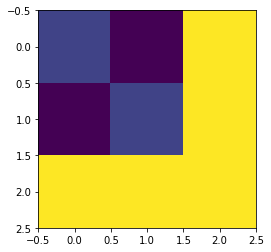

In [99]:
solution(key, lock)

In [76]:
def solution(key, lock) :
    new_lock = padding(key, lock)
    lock_flat = flatten(lock)

    answer = False

    for i in range(4) :
        first = False
        key_flat = flatten(key)

        for j in range(len(new_lock)-(len(key)-1)-1) :
            second = False

            for k in range(len(new_lock)-(len(key)-1)-1) :
                sep = separate(key, new_lock, j, k)
                sep_flat = flatten(sep)

                if sep_flat.count(0) == lock_flat.count(0) :
                    sum_ = []

                    for l in range(len(sep_flat)) :
                        sum_.append(sep_flat[l]+key_flat[l])

                    if not 0 in sum_ :
                        answer = True
                        second = True
                        first = True
                        break   
            if second :
                break
        if first :
            break

        key = rotate(key)

    return answer

In [72]:
key = [[1,1,1], [1,1,1], [1,1,1]]
lock = [[0,0,0], [0,0,0], [0,0,0]]

In [79]:
solution(key, lock)

True

In [105]:
key = [[0,0,0], [1,0,0], [0,1,1]]
lock = [[1,1,1], [1,1,0], [1,0,1]]

In [9]:
new_lock = padding(key, lock)
new_lock

[[5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5],
 [5, 5, 1, 1, 1, 5, 5],
 [5, 5, 1, 1, 0, 5, 5],
 [5, 5, 1, 0, 1, 5, 5],
 [5, 5, 5, 5, 5, 5, 5],
 [5, 5, 5, 5, 5, 5, 5]]

In [10]:
key = rotate(key)

In [11]:
lock_flat = flatten(lock)

In [12]:
len(new_lock)-(len(key)-1)

5

In [ ]:
new_lock = padding(key, lock)
lock_flat = flatten(lock)

for i in range(4) :
    for j in range(len(new_lock)-(len(key)-1)-1) :
        for k in range(len(new_lock)-(len(key)-1)-1) :
            sep = separate(key, new_lock, j, k)
            sep_flat = flatten(sep)
            
            if sep_flat.count(0) == lock_flat.count(0) :
                sum_ = []
                key_flat = flatten(key)

                for i in range(len(sep_flat)) :
                    sum_.append(sep_flat[i]+key_flat[i])

                if not 0 in sum_ :
                    answer = True
                    break
            
    key = rotate(key)

In [46]:
# new_lock = padding(key, lock)
# lock_flat = flatten(lock)

# def sliding(key, new_lock, lock_flat, count, row, col, result) :    
#     if row > len(new_lock)-(len(key)-1)-1 :
#         row = 0
#         col += 1

#     if col > len(new_lock)-(len(key)-1)-1 :
#         col = 0
#         count += 1
    
#     if count != 0 :
#         key = rotate(key)
        
# #     print("row: ", row, "col: ", col, "count: ", count)
        
#     if count > 4 :
# #         print("finish")
#         result.append(False)
#         return
    
#     sep = separate(key, new_lock, row, col)
#     sep_flat = flatten(sep)

#     if sep_flat.count(0) != lock_flat.count(0) :
#         sliding(key, new_lock, lock_flat, count, row+1, col, result)
        
#     else :
#         sum_ = []
#         key_flat = flatten(key)
        
#         for i in range(len(sep_flat)) :
#             sum_.append(sep_flat[i]+key_flat[i])
            
#         if not 0 in sum_ :
# #             print("True")
# #             print("sep: ", sep, "  //   key: ", key)
#             result.append(True)
#             return
#         else :
#             sliding(key, new_lock, lock_flat, count, row+1, col, result)

In [4]:
# key 회전
def rotate(key) :
    result = []
    num = len(key)
    
    # key의 데이터를 flat하게 나열
    key = np.array(key)
    key = list(key.reshape(len(key)**2))
    
    # 나열한 데이터를 재정렬(회전)
    for i in range(int(len(key)**0.5)) :
        data = []
        for j in range(0, len(key), num) :
            data.append(key[int(len(key)-len(key)**0.5)+2*i-(i+j)])
        result.append(data)
    
    return result

In [5]:
def padding(key, lock) :
    padding = len(key)-1
    
    new_lock = [[5 for col in range(len(lock)+(2*padding))] for col in range(len(lock)+(2*padding))]
    
    for i in range(len(lock)) :
        for j in range(len(lock)) :
            new_lock[padding+i][padding+j] = lock[i][j]
    
    return new_lock

In [6]:
def separate(key, new_lock, row, col) :
    sep_lock = []
    
    for i in range(len(key)) :
        result = []
        for j in range(len(key)) :
            result.append(new_lock[row+i][col+j])
            
        sep_lock.append(result)
    
    return sep_lock

In [10]:
import matplotlib.pyplot as plt

In [7]:
def flatten(lock) :
    lock = np.array(lock)
    lock = list(lock.reshape(len(lock)**2))
    
    return lock

In [145]:
def sliding_window(key, lock, array, num=0, row=0, col=0) :
    new_lock = add_padding(lock, key)
    
    if num != 0 :
        key = rotate(key)
        
    if num > 3:
        array.append("False")
        return 
    
    sep_lock = separate(key, new_lock, row, col)
    
    total_sum = []
    
    for i in range(len(key)) :
        for j in range(len(key)) :
            total_sum.append(key[i][j] + sep_lock[i][j])
                
    if 2 in total_sum :            
        row += 1
        if row > len(lock)+2*(len(key)-1)-(len(key)-1) :
            row = 0
            col += 1
            
        if col > len(lock)+2*(len(key)-1)-(len(key)-1) :
            row = 0
            col = 0
            num += 1
            
        sliding_window(key, lock, array, num, row, col)
        
    else :
        array.append("True")
        return 